In [6]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve

In [7]:
#read data
df = pd.read_csv('cleaned_parishousing_dataset.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [8]:
x = np.array(df.drop(['price'], axis=1))  #drop target
y = np.array(df['price'])  #target

In [10]:
x

array([[75523,     3,     0, ...,   956,     0,     7],
       [80771,    39,     1, ...,   128,     1,     2],
       [55712,    58,     0, ...,   135,     1,     9],
       ...,
       [83841,     3,     0, ...,   345,     1,     9],
       [59036,    70,     0, ...,   339,     1,     4],
       [ 1440,    84,     0, ...,   278,     1,     6]], dtype=int64)

In [11]:
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=23,
                                                    shuffle=True)

In [14]:
lr_model = LinearRegression()

In [15]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [16]:
# regression coefficients
print('Coefficients: ', lr_model.coef_)

Coefficients:  [ 1.00000322e+02  4.90699929e-01  3.01017785e+03  2.98151937e+03
  5.42239496e+01 -6.87734072e-04  4.20512505e+01 -1.80568339e+00
 -2.22712608e+00  1.65866306e+02  1.26514250e+02  4.94854648e-03
 -1.06933047e-02  1.94226402e-01  2.34058588e+01 -1.22825732e+01]


In [18]:
y_pred = lr_model.predict(x_test)

In [20]:
lr_model.score(x_test, y_test)

0.9999995564824372

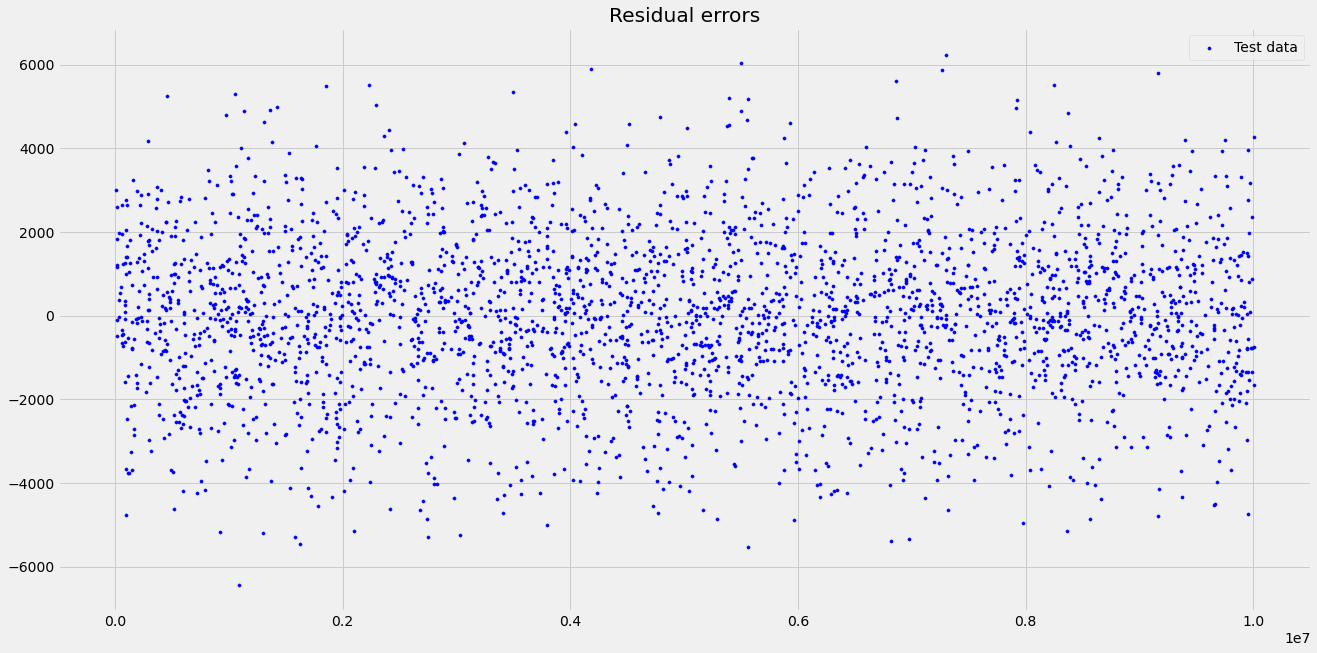

In [28]:
#plt training & testing datapoint
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 10))
# plotting residual errors in training data
"""plt.scatter(lr_model.predict(x_train),
            lr_model.predict(x_train) - y_train,
            color="green",
            s=10,
            label='Train data')"""
# plotting residual errors in test data
plt.scatter(lr_model.predict(x_test),
            lr_model.predict(x_test) - y_test,
            color="blue",
            s=10,
            label='Test data')
# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=100, linewidth=2)
# plotting legend
plt.legend(loc='upper right')
# plot title
plt.title("Residual errors")
# method call for showing the plot
plt.show()